Estimated complexity: n^2.361


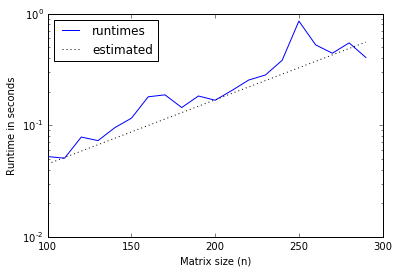

In [33]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

# Setup
n_iter = 100
max_size = 300
sizes = np.arange(100,max_size,10)
runtimes = np.zeros(sizes.shape[0])

# Time the matrix inversions
for i,n in enumerate(sizes):
    runtimes[i] = timeit.timeit('np.linalg.inv(A)',number=n_iter,setup="import numpy as np; np.random.seed(1); A = np.random.rand(%d,%d)"%(n,n))

# Estimate the constant and degree
log_runtimes = np.log(runtimes)
coefs = np.polyfit(np.log(sizes),log_runtimes,deg=1)
print("Estimated complexity: n^%.3f"%coefs[0])

# Plot log runtimes
plt.clf()
plt.semilogy(sizes,runtimes,label="runtimes")
line_x = np.array([sizes[0],sizes[-1]])
line_y = np.exp(coefs[1] + np.log(line_x)*coefs[0])
plt.semilogy(line_x,line_y,':k',label="estimated")
plt.ylabel("Runtime in seconds")
plt.xlabel("Matrix size (n)")
plt.legend(loc=0)
plt.show()
